# Detecção e remoção de valores anômalos

In [332]:
import numpy

dados = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 
       453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 
       512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 
       689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543,30, 1300, 1350, 1400]

dados = numpy.array(dados)
print(dados)

[  10  386  479  627   20  523  482  483  542  699  535  617  577  471
  615  583  441  562  563  527  453  530  433  541  585  704  443  569
  430  637  331  511  552  496  484  566  554  472  335  440  579  341
  545  615  548  604  439  556  442  461  624  611  444  578  405  487
  490  496  398  512  422  455  449  432  607  679  434  597  639  565
  415  486  668  414  665  763  557  304  404  454  689  610  483  441
  657  590  492  476  437  483  529  363  711  543   30 1300 1350 1400]


In [333]:
type(dados)

numpy.ndarray

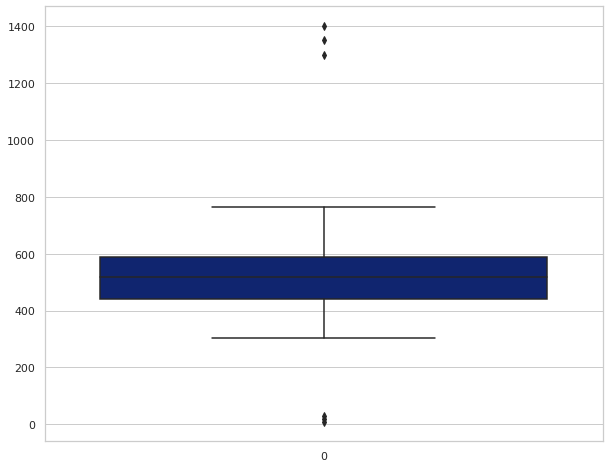

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',palette='dark',color_codes=True)
plt.figure(figsize=(10,8))
sns.boxplot(data=dados);

In [335]:
# média
dados.mean()

530.3673469387755

In [336]:
# desvio padrão
dados.std()

192.51166875607043

In [337]:
mean = numpy.mean(dados, axis=0) # ou dados.mean()
sd = numpy.std(dados, axis=0) # ou dados.std()

In [338]:
# fronteira de valores abaixo da média em duas vezes o desvio padrão
mean - 2 * sd

145.34400942663467

In [339]:
# fronteira de valores aacima da média em duas vezes o desvio padrão
mean + 2 * sd

915.3906844509164

In [340]:
# listando os valores abaixo da média em duas vezes o desvio padrão
for x in dados:
        if (x < mean - 2 * sd):
            print(x)

10
20
30


In [341]:
# listando os valores acima da média em duas vezes o desvio padrão
for x in dados:
        if (x > mean + 2 * sd):
            print(x)

1300
1350
1400


In [342]:
# removendo os valores muito abaixo da média (10,20,30)
dados = [x for x in dados if (x > mean - 2 * sd)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543, 1300, 1350, 1400]


In [343]:
# removendo os valores muito acima da média (1300,1350,1400)
dados = [x for x in dados if (x < mean + 2 * sd)]
print(dados)


[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


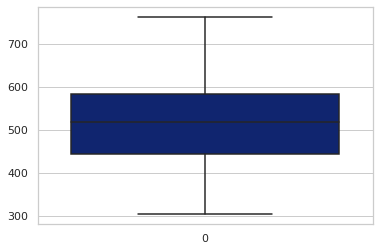

In [344]:
sns.boxplot(data=dados);

# Discretização ou Binarização

In [345]:
# qcut --> Função de discretização baseada em quantis.
import pandas as pd

In [346]:
# dados para discretizar
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

In [347]:
# aplicando em 3 bins 
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [348]:
# verificando 
altura

[P, P, M, M, G, G]
Categories (3, object): [P < M < G]

In [349]:
# verificando valores
altura.value_counts()

P    2
M    2
G    2
dtype: int64

In [350]:
novas_alturas=[1.50,1.57,1.62,1.70,1.85,1.90,1.40,1.70,1.30,2.00,2.10]

In [351]:
novas_alturas_disc1=pd.qcut(novas_alturas,3,labels=['P','M','G'])

In [352]:
novas_alturas_disc1

[P, P, M, M, G, ..., P, M, P, G, G]
Length: 11
Categories (3, object): [P < M < G]

In [353]:
novas_alturas_disc1.value_counts()

P    4
M    3
G    4
dtype: int64

In [354]:
# com 4 bins bins
novas_alturas_disc2=pd.qcut(novas_alturas,4,labels=['P','M','G','GG'])

In [355]:
novas_alturas_disc2

[P, M, M, M, G, ..., P, M, P, GG, GG]
Length: 11
Categories (4, object): [P < M < G < GG]

In [356]:
novas_alturas_disc2.value_counts()

P     3
M     4
G     1
GG    3
dtype: int64

In [357]:
type(novas_alturas_disc2)

pandas.core.arrays.categorical.Categorical

In [358]:
df=pd.DataFrame()

In [359]:
df['num']=novas_alturas

In [360]:
df['disc']=novas_alturas_disc2

In [361]:
df

,num,disc
0,1.50,P
1,1.57,M
2,1.62,M
3,1.70,M
4,1.85,G
5,1.90,GG
6,1.40,P
7,1.70,M
8,1.30,P
9,2.00,GG


In [362]:
# com 5 bins bins
novas_alturas_disc3=pd.qcut(novas_alturas,5,labels=['PP','P','M','G','GG'])

In [363]:
novas_alturas_disc3

[PP, P, P, M, G, ..., PP, M, PP, GG, GG]
Length: 11
Categories (5, object): [PP < P < M < G < GG]

In [364]:
novas_alturas_disc3.value_counts()

PP    3
P     2
M     2
G     2
GG    2
dtype: int64

In [365]:
df2=pd.DataFrame()
df2['num']=novas_alturas
df2['disc']=novas_alturas_disc3

In [366]:
df2

,num,disc
0,1.50,PP
1,1.57,P
2,1.62,P
3,1.70,M
4,1.85,G
5,1.90,G
6,1.40,PP
7,1.70,M
8,1.30,PP
9,2.00,GG


## Discretização em uma BD real

In [367]:
bd=pd.read_csv('/home/amador/Root/Arquivos/Materiais de Aula/DSZ/M06/materiais_apoio/kc_house_data.csv')

In [368]:
bd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [369]:
# contando o número de pisos
bd['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [370]:
# discretizando 
# observação --> embora sejam 6 categorias, estão sendo usados 5 bins, logo ficarão resultados diferentes
bd['floors_labels'] = pd.cut(
    bd['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

In [371]:
bd['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

In [372]:
bd['floors_labels'].unique()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

# Normalização
#### * deixa os valores mais próximos da normal, ou seja, mais próximos da média
#### * altera a distribuição

In [373]:
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [374]:
# dados de exemplo
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


In [375]:
np.mean(data)

4.5625

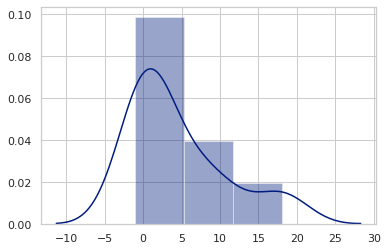

In [376]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

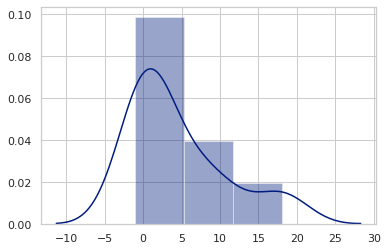

In [377]:
sns.distplot(data);

In [378]:
# criação do objeto
normalizer = Normalizer().fit(data)

In [379]:
# aplicação da transformação
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


In [380]:
# alterando para apenas uma dimensão
data2 = data2.reshape(-1)
print(data2)

[-0.4472136   0.89442719  0.08304548  0.99654576  0.          1.
  0.05547002  0.99846035]


In [381]:
np.mean(data)

4.5625

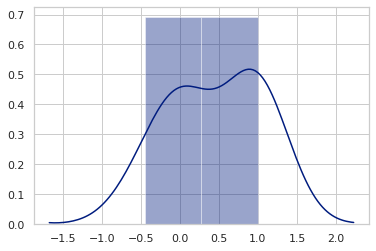

In [382]:
sns.distplot(data2);

# Standartization - Padronização
#### * coloca os valores entre 0 e 1
#### * não altera a distribuição

In [383]:
data = np.random.normal(size = 50)
print(data)

[ 1.52401698  0.19682872  0.39319133 -0.36153028  1.3420208   0.72530454
 -0.79558371  0.22902232 -0.08805343  0.06077823 -2.14719784  0.09462909
 -0.33518655  0.56172705 -1.17704878 -0.06923439  0.7444538  -0.5195991
 -1.11905577 -1.10544697  0.25791995  1.19951214  1.36936514 -1.02090039
  1.70464623 -1.4480458  -1.11633163  2.01081226 -0.60229996  0.47547579
 -0.42437961 -0.28807422  1.68724142  1.27571142  0.31994093 -0.04094788
  2.39797523 -1.72285258 -0.15889589 -1.01259536  0.28964707  0.00905642
  1.38396695  1.3801405   0.26179052  0.45583648  0.46869789 -2.36491613
  0.80515235 -0.34309763]


In [384]:
# colocando os dados na dimensão 1x1
data = data.reshape(-1,1)
data

array([[ 1.52401698],
       [ 0.19682872],
       [ 0.39319133],
       [-0.36153028],
       [ 1.3420208 ],
       [ 0.72530454],
       [-0.79558371],
       [ 0.22902232],
       [-0.08805343],
       [ 0.06077823],
       [-2.14719784],
       [ 0.09462909],
       [-0.33518655],
       [ 0.56172705],
       [-1.17704878],
       [-0.06923439],
       [ 0.7444538 ],
       [-0.5195991 ],
       [-1.11905577],
       [-1.10544697],
       [ 0.25791995],
       [ 1.19951214],
       [ 1.36936514],
       [-1.02090039],
       [ 1.70464623],
       [-1.4480458 ],
       [-1.11633163],
       [ 2.01081226],
       [-0.60229996],
       [ 0.47547579],
       [-0.42437961],
       [-0.28807422],
       [ 1.68724142],
       [ 1.27571142],
       [ 0.31994093],
       [-0.04094788],
       [ 2.39797523],
       [-1.72285258],
       [-0.15889589],
       [-1.01259536],
       [ 0.28964707],
       [ 0.00905642],
       [ 1.38396695],
       [ 1.3801405 ],
       [ 0.26179052],
       [ 0

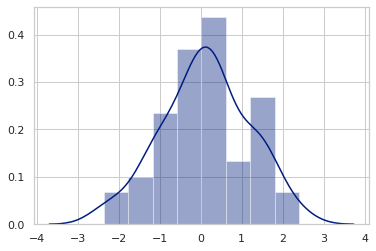

In [385]:
sns.distplot(data);

In [386]:
# criando objeto standartization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data)

In [387]:
# transformando os dados
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.81650678]
 [0.53785498]
 [0.57908259]
 [0.42062388]
 [0.7782955 ]
 [0.64881192]
 [0.32949154]
 [0.54461424]
 [0.47804212]
 [0.5092903 ]
 [0.04571137]
 [0.51639751]
 [0.42615492]
 [0.61446776]
 [0.24940047]
 [0.4819933 ]
 [0.65283243]
 [0.38743631]
 [0.26157648]
 [0.26443374]
 [0.55068148]
 [0.74837488]
 [0.78403663]
 [0.28218484]
 [0.85443107]
 [0.19250289]
 [0.26214843]
 [0.91871262]
 [0.37007272]
 [0.59635875]
 [0.40742826]
 [0.43604646]
 [0.85077682]
 [0.76437342]
 [0.56370319]
 [0.48793224]
 [1.        ]
 [0.13480542]
 [0.46316829]
 [0.28392854]
 [0.5573428 ]
 [0.49843097]
 [0.78710237]
 [0.78629898]
 [0.55149414]
 [0.59223535]
 [0.59493568]
 [0.        ]
 [0.66557648]
 [0.42449394]]


In [388]:
# reshape
data_scaled = data_scaled.reshape(-1,1)
data_scaled

array([[0.81650678],
       [0.53785498],
       [0.57908259],
       [0.42062388],
       [0.7782955 ],
       [0.64881192],
       [0.32949154],
       [0.54461424],
       [0.47804212],
       [0.5092903 ],
       [0.04571137],
       [0.51639751],
       [0.42615492],
       [0.61446776],
       [0.24940047],
       [0.4819933 ],
       [0.65283243],
       [0.38743631],
       [0.26157648],
       [0.26443374],
       [0.55068148],
       [0.74837488],
       [0.78403663],
       [0.28218484],
       [0.85443107],
       [0.19250289],
       [0.26214843],
       [0.91871262],
       [0.37007272],
       [0.59635875],
       [0.40742826],
       [0.43604646],
       [0.85077682],
       [0.76437342],
       [0.56370319],
       [0.48793224],
       [1.        ],
       [0.13480542],
       [0.46316829],
       [0.28392854],
       [0.5573428 ],
       [0.49843097],
       [0.78710237],
       [0.78629898],
       [0.55149414],
       [0.59223535],
       [0.59493568],
       [0.   

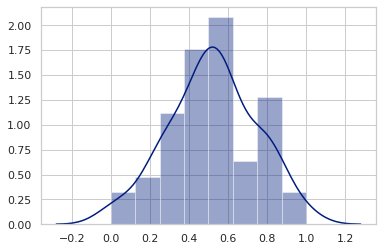

In [389]:
sns.distplot(data_scaled);

# StandardScaler
#### * padroniza sem alterar a forma dos dados
#### * é igual à standartization, porém é mais suave, não limitando de 0 a 1

In [390]:
data = np.random.normal(size = 50)
print(data)

[ 1.02907273  1.27370551  1.42286735  0.96672081 -0.82571638  0.9989798
 -0.39837671 -1.75800787  0.48750853  0.67299285 -1.49511753  0.40019874
 -0.2321481   0.41058119 -0.57460357 -0.78586961  0.6615928  -0.08827445
 -1.30344666  0.07044894 -0.88288279  0.91814977 -1.17983731  0.37924683
 -1.64926729 -0.4044373  -0.94961452  1.22845154  1.59866867  0.66038011
 -0.45874288  0.32403505 -0.45393455 -0.90927516 -1.00935499 -0.2902622
  1.0056845   1.92324488  0.31671853  0.85183213 -0.56190284 -0.58097081
 -0.66046907 -1.30365773 -0.68233199 -1.88178651 -1.77869119 -0.39637368
 -0.81812839  0.62198041]


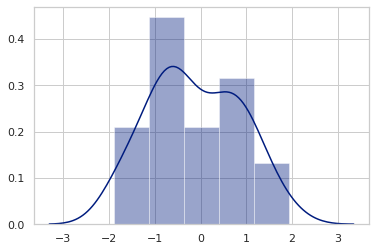

In [391]:
sns.distplot(data);

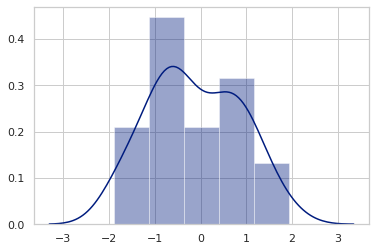

In [392]:
data = data.reshape(-1,1)
sns.distplot(data);

In [393]:
print(data)

[[ 1.02907273]
 [ 1.27370551]
 [ 1.42286735]
 [ 0.96672081]
 [-0.82571638]
 [ 0.9989798 ]
 [-0.39837671]
 [-1.75800787]
 [ 0.48750853]
 [ 0.67299285]
 [-1.49511753]
 [ 0.40019874]
 [-0.2321481 ]
 [ 0.41058119]
 [-0.57460357]
 [-0.78586961]
 [ 0.6615928 ]
 [-0.08827445]
 [-1.30344666]
 [ 0.07044894]
 [-0.88288279]
 [ 0.91814977]
 [-1.17983731]
 [ 0.37924683]
 [-1.64926729]
 [-0.4044373 ]
 [-0.94961452]
 [ 1.22845154]
 [ 1.59866867]
 [ 0.66038011]
 [-0.45874288]
 [ 0.32403505]
 [-0.45393455]
 [-0.90927516]
 [-1.00935499]
 [-0.2902622 ]
 [ 1.0056845 ]
 [ 1.92324488]
 [ 0.31671853]
 [ 0.85183213]
 [-0.56190284]
 [-0.58097081]
 [-0.66046907]
 [-1.30365773]
 [-0.68233199]
 [-1.88178651]
 [-1.77869119]
 [-0.39637368]
 [-0.81812839]
 [ 0.62198041]]


In [394]:
# criando objeto
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)


In [395]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 1.1890897 ]
 [ 1.44184414]
 [ 1.59595806]
 [ 1.12466773]
 [-0.7272773 ]
 [ 1.1579977 ]
 [-0.2857502 ]
 [-1.6905203 ]
 [ 0.6295459 ]
 [ 0.82118818]
 [-1.41890216]
 [ 0.53933748]
 [-0.1140029 ]
 [ 0.55006461]
 [-0.46782769]
 [-0.68610763]
 [ 0.80940966]
 [ 0.03464726]
 [-1.22086793]
 [ 0.19864018]
 [-0.78634159]
 [ 1.07448417]
 [-1.09315483]
 [ 0.51768997]
 [-1.5781696 ]
 [-0.292012  ]
 [-0.85528878]
 [ 1.39508777]
 [ 1.77759588]
 [ 0.8081567 ]
 [-0.34812049]
 [ 0.4606452 ]
 [-0.34315253]
 [-0.81361017]
 [-0.9170126 ]
 [-0.17404636]
 [ 1.164925  ]
 [ 2.11294783]
 [ 0.45308577]
 [ 1.00596483]
 [-0.45470531]
 [-0.47440632]
 [-0.55654387]
 [-1.22108601]
 [-0.57913263]
 [-1.81840832]
 [-1.7118903 ]
 [-0.28368068]
 [-0.71943738]
 [ 0.76848216]]


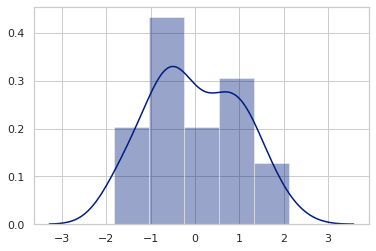

In [396]:
data_scaled = data_scaled.reshape(-1,1)
sns.distplot(data_scaled);

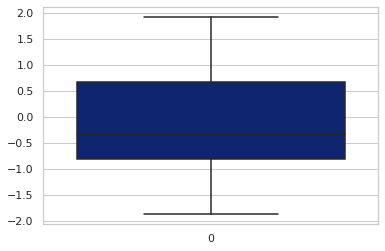

In [397]:
sns.boxplot(data=data);

In [398]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep=",")

In [399]:
df.head(3)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [400]:
df.shape

(177, 14)

In [401]:
# definindo o nome das colunas
df.columns = [ 'Class'
              ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
             ]

In [402]:
df.head()

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [403]:
df.shape

(177, 14)

In [404]:
df.describe()

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                177 non-null    int64  
 1   alcohol              177 non-null    float64
 2   malicAcid            177 non-null    float64
 3   ash                  177 non-null    float64
 4   ashalcalinity        177 non-null    float64
 5   magnesium            177 non-null    int64  
 6   totalPhenols         177 non-null    float64
 7   flavanoids           177 non-null    float64
 8   nonFlavanoidPhenols  177 non-null    float64
 9   proanthocyanins      177 non-null    float64
 10  colorIntensity       177 non-null    float64
 11  hue                  177 non-null    float64
 12  od280_od315          177 non-null    float64
 13  proline              177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [406]:
df['Class'].unique()

array([1, 2, 3])

In [407]:
df['Class'].value_counts()

2    71
1    58
3    48
Name: Class, dtype: int64

In [408]:
df_sub = df[['proline','alcohol','malicAcid','magnesium','flavanoids']]

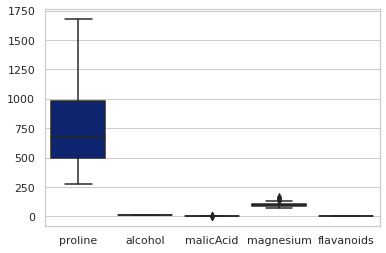

In [409]:
import seaborn as sns
ax=sns.boxplot(data=df_sub);

In [410]:
df_sub.describe()

,proline,alcohol,malicAcid,magnesium,flavanoids
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,745.096045,12.993672,2.339887,99.587571,2.023446
std,314.884046,0.808808,1.119314,14.174018,0.998658
min,278.000000,11.030000,0.740000,70.000000,0.340000
25%,500.000000,12.360000,1.600000,88.000000,1.200000
50%,672.000000,13.050000,1.870000,98.000000,2.130000
75%,985.000000,13.670000,3.100000,107.000000,2.860000
max,1680.000000,14.830000,5.800000,162.000000,5.080000


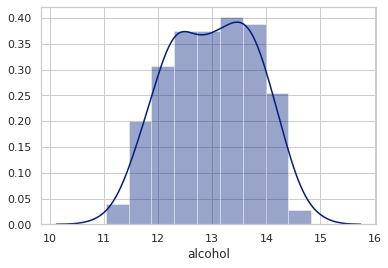

In [411]:
sns.distplot(df_sub.alcohol);

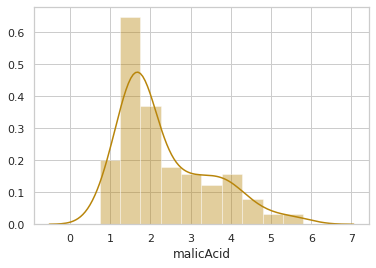

In [412]:
sns.distplot(df_sub.malicAcid, color='y');

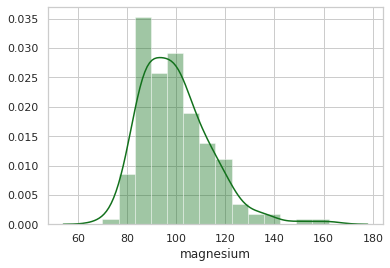

In [413]:
sns.distplot(df_sub.magnesium, color='g');

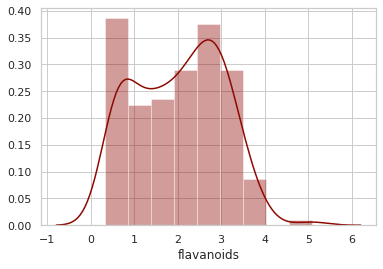

In [414]:
sns.distplot(df_sub.flavanoids, color='r');

#### Standartization

In [415]:
from sklearn.preprocessing import StandardScaler

In [416]:
# criando objeto e tranformando os dados
obj_std = StandardScaler().fit(df)
df_std = obj_std.transform(df)
print(df_std)


[[-1.22246766  0.2558245  -0.50162433 ...  0.40709978  1.13169801
   0.97105248]
 [-1.22246766  0.20622873  0.01802001 ...  0.3195674   0.80457911
   1.40099798]
 [-1.22246766  1.70650069 -0.34931478 ... -0.4244579   1.20281081
   2.34050852]
 ...
 [ 1.36887097  0.34261709  1.73822194 ... -1.60614514 -1.48525319
   0.28632445]
 [ 1.36887097  0.21862767  0.22408586 ... -1.56237895 -1.39991783
   0.30224836]
 [ 1.36887097  1.40892609  1.57695301 ... -1.51861275 -1.42836295
  -0.58949046]]


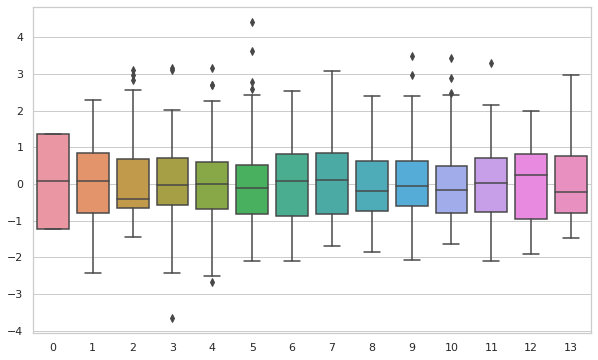

In [417]:
# plotando
plt.figure(figsize=(10,6))
sns.boxplot(data=df_std);


In [418]:
# transformando em dataframe e dando um describe
df_std = pd.DataFrame(df_std)
df_std.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,1.327250e-15,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.222468e+00,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-1.222468e+00,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,7.320166e-02,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,1.368871e+00,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,1.368871e+00,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


## Normalizando

In [419]:
from sklearn.preprocessing import StandardScaler

In [420]:
df.head(3)

,Class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [421]:
# criando objeto e tranformando os dados

obj_norm = MinMaxScaler().fit(df)
norm_df = obj_norm.transform(df)
print(norm_df)

[[0.         0.57105263 0.2055336  ... 0.46341463 0.78021978 0.55064194]
 [0.         0.56052632 0.3201581  ... 0.44715447 0.6959707  0.64693295]
 [0.         0.87894737 0.23913043 ... 0.30894309 0.7985348  0.85734665]
 ...
 [1.         0.58947368 0.69960474 ... 0.08943089 0.10622711 0.39728959]
 [1.         0.56315789 0.36561265 ... 0.09756098 0.12820513 0.40085592]
 [1.         0.81578947 0.66403162 ... 0.10569106 0.12087912 0.20114123]]


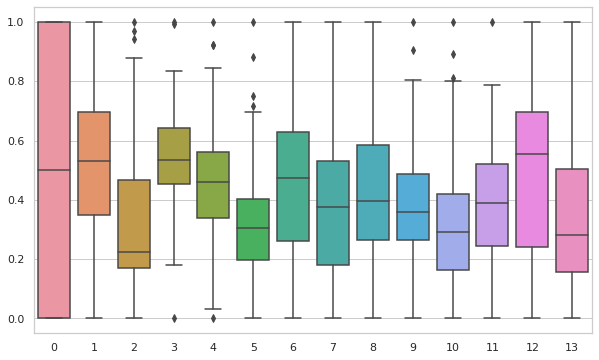

In [422]:
plt.figure(figsize=(10,6))
sns.boxplot(data=norm_df);

In [423]:
# transformando em dataframe e dando um describe
norm_df = pd.DataFrame(norm_df)
norm_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.471751,0.516756,0.316183,0.538053,0.459637,0.321604,0.452503,0.355157,0.438333,0.371277,0.322082,0.387791,0.488752,0.333164
std,0.386996,0.212844,0.221208,0.147102,0.171962,0.154065,0.216022,0.210687,0.235194,0.180298,0.198332,0.186289,0.258279,0.224596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350000,0.169960,0.454545,0.340206,0.195652,0.262069,0.181435,0.264151,0.264984,0.164676,0.243902,0.241758,0.158345
50%,0.500000,0.531579,0.223320,0.534759,0.458763,0.304348,0.472414,0.377637,0.396226,0.359621,0.290102,0.390244,0.553114,0.281027
75%,1.000000,0.694737,0.466403,0.641711,0.561856,0.402174,0.627586,0.531646,0.584906,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Algoritmos de ML

In [424]:
# dividindo em features e classe
X = df.drop('Class', axis=1)
y = df['Class']

In [425]:
# dividinvo em dados de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### knn

In [426]:
from sklearn.neighbors import KNeighborsClassifier
# criando o objeto
knn = KNeighborsClassifier()

In [427]:
# treinando os dados
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [428]:
# atribuindo as classificações à variável 'resultados'
y_pred = knn.predict(X_test)
#y_pred e resultados são bem utilizados na literatura

In [429]:
from sklearn.metrics import accuracy_score
# checando a acurácia
score1 = accuracy_score(y_test, y_pred)
score1

0.75

## Outras métricas [aqui](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
##### lembrando que essa é a distribuição das classes:
###### 2  -   71
###### 1   -  58
###### 3    - 48

In [430]:
# exemplo com f1 score
from sklearn.metrics import f1_score

f1=f1_score(y_test, y_pred, average='micro')
f1

0.75

In [431]:
f1_score(y_test, y_pred, average='weighted')

0.7425983977708116

In [432]:
f1_score(y_test, y_pred, average='macro')

0.670062695924765

In [433]:
# matriz de confusão
pd.crosstab(y_test, y_pred,rownames=['Real'],colnames=['Predito'],margins=True)

Predito,1,2,3,All
Real,,,,
1,13,0,1,14
2,2,12,2,16
3,0,4,2,6
All,15,16,5,36


In [434]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.75      0.75      0.75        16
           3       0.40      0.33      0.36         6

    accuracy                           0.75        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.74      0.75      0.74        36



In [435]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(knn,df.drop('Class',axis=1),df['Class'],cv=5)
val_score

array([0.72222222, 0.63888889, 0.65714286, 0.68571429, 0.71428571])

In [436]:
# mse é significa o erro médio
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse
# quanto mais próximo de zero, melhor

0.3333333333333333

In [437]:
# Root Mean Square Erro - Mede diferença entre valores reais e preditos
# A diferença é chamada de residuo
# utilizado em regressões
# utiliza unidades independentes
# o rmse entrega na mesma unidade que os valores usados
rmse=mean_squared_error(y_test,y_pred)**0.5
rmse

0.5773502691896257

In [438]:
# outra forma de aplicar o rmse
from math import sqrt
rmse_2 = sqrt(mean_squared_error(y_test,y_pred))
rmse_2

0.5773502691896257

In [439]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Class   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              603.4
Date:                Wed, 10 Jun 2020   Prob (F-statistic):                   4.35e-131
Time:                        23:03:42   Log-Likelihood:                         -37.611
No. Observations:                 177   AIC:                                      101.2
Df Residuals:                     164   BIC:                                      142.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
alcohol                 0.1560      0.026      6.071      0.000       0.105       0.207
malicAcid               0.0211      0.027      0.783      0.435      -0.032       0.074
ash                    -0.1279      0.126     -1.016      0.311      -0.376       0.121
ashalcalinity           0.0605      0.010      5.978      0.000       0.041       0.081
magnesium               0.0028      0.002      1.459      0.146      -0.001       0.007
totalPhenols            0.1726      0.078      2.217      0.028       0.019       0.326
flavanoids             -0.4347      0.061     -7.073      0.000      -0.556      -0.313
nonFlavanoidPhenols    -0.0061      0.249     -0.024      0.981      -0.497       0.485
proanthocyanins         0.0862      0.057      1.511      0.133      -0.026       0.199
colorIntensity          0.0542      0.017      3.132      0.002       0.020       0.088
hue                     0.1052      0.160      0.658      0.511      -0.210       0.421
od280_od315            -0.2124      0.064     -3.296      0.001      -0.340      -0.085
proline                -0.0010      0.000     -8.862      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.734   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.586
Skew:                           0.140   Prob(JB):                        0.746
Kurtosis:                       3.030   Cond. No.                     8.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# One Hot Enconding, Label Encoder e Get Dummies

In [440]:
dadoscar=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')

In [441]:
dadoscar

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


### Get dummies

In [442]:
dummies=pd.get_dummies(dadoscar['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [443]:
# atribuindo ao df
merged=pd.concat([dadoscar,dummies],axis=1) # pode ser axis=columns
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [444]:
merged_final=merged.drop(['Car Model','Audi A5'],axis='columns')
merged_final
# observação: Ao fazer o get dummies, se exclui uma das categorias para evitar o efeito da multicolinearidade.
# logo se são 3 categorias, tem-se que excluir uma.
# Multicolinearidade consiste em um problema comum em regressões, no qual as variáveis independentes possuem relações lineares exatas ou aproximadamente exatas.

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


### Label Enconder

In [445]:
dadoscar.head(3)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5


In [446]:
from sklearn.preprocessing import LabelEncoder
# criando objeto
le=LabelEncoder()

In [447]:
dados_le=dadoscar
# atribuindo os dados --> Serão arrays
le.fit_transform(dados_le['Car Model'])

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [448]:
# pode ser feito direto, assim:
dados_le=dadoscar
dados_le['Car Model']=le.fit_transform(dados_le['Car Model'])
dados_le['Car Model']

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     2
10    2
11    2
12    2
Name: Car Model, dtype: int64

In [449]:
dados_le

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


### One Hot Encoding

In [450]:
# Transformando em array numpy o dataset
dataset_array=dados_le.values
type(dataset_array)

numpy.ndarray

In [451]:
# Pegando o numero de linhas.
num_rows = dataset_array.shape[0] # shape[0] significa pegar o shape (ou tamanho) de linhas
num_rows

13

In [452]:
dataset_array

array([[    1, 69000, 18000,     6],
       [    1, 35000, 34000,     3],
       [    1, 57000, 26100,     5],
       [    1, 22500, 40000,     2],
       [    1, 46000, 31500,     4],
       [    0, 59000, 29400,     5],
       [    0, 52000, 32000,     5],
       [    0, 72000, 19300,     6],
       [    0, 91000, 12000,     8],
       [    2, 67000, 22000,     6],
       [    2, 83000, 20000,     7],
       [    2, 79000, 21000,     7],
       [    2, 59000, 33000,     5]])

In [453]:
# Visualizando coluna de preços
dataset_array[:][:,2]

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

In [454]:
from sklearn.preprocessing import OneHotEncoder
# criando o objeto
ohe=OneHotEncoder()

In [455]:
# pegando os valores da coluna como array
col_array=dados_le['Car Model'].values
# fazendo reshape na dimensão 13x1
inteiros = col_array.reshape(len(col_array),1)

In [456]:
inteiros.shape

(13, 1)

In [457]:
# imprimindo inteiros para observar a forma dos dados
inteiros

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]])

In [458]:
# Criando as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)

In [459]:
# Imprimindo as novas features
novas_features

<13x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [460]:
type(novas_features)

scipy.sparse.csr.csr_matrix

In [461]:
# Concatenando as novas features ao array em formato array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [462]:
dataset_array.shape

(13, 7)

In [463]:
# Transformando em dataframe e visualiza as colunas
dataf = pd.DataFrame(dataset_array)

In [464]:
dataf.head(13)

,0,1,2,3,4,5,6
0,1.0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,1.0,35000.0,34000.0,3.0,0.0,1.0,0.0
2,1.0,57000.0,26100.0,5.0,0.0,1.0,0.0
3,1.0,22500.0,40000.0,2.0,0.0,1.0,0.0
4,1.0,46000.0,31500.0,4.0,0.0,1.0,0.0
5,0.0,59000.0,29400.0,5.0,1.0,0.0,0.0
6,0.0,52000.0,32000.0,5.0,1.0,0.0,0.0
7,0.0,72000.0,19300.0,6.0,1.0,0.0,0.0
8,0.0,91000.0,12000.0,8.0,1.0,0.0,0.0
9,2.0,67000.0,22000.0,6.0,0.0,0.0,1.0


In [465]:
# renomeando as colunas do df
dataf.columns=['Car Model','Mileage','Sell Price($)','Age(yrs)','car1','car2','car3']

In [466]:
dataf.head()

,Car Model,Mileage,Sell Price($),Age(yrs),car1,car2,car3
0,1.0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,1.0,35000.0,34000.0,3.0,0.0,1.0,0.0
2,1.0,57000.0,26100.0,5.0,0.0,1.0,0.0
3,1.0,22500.0,40000.0,2.0,0.0,1.0,0.0
4,1.0,46000.0,31500.0,4.0,0.0,1.0,0.0


In [467]:
# dropando o car model
dataf.drop(['Car Model'],axis=1,inplace=True)
dataf

,Mileage,Sell Price($),Age(yrs),car1,car2,car3
0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,35000.0,34000.0,3.0,0.0,1.0,0.0
2,57000.0,26100.0,5.0,0.0,1.0,0.0
3,22500.0,40000.0,2.0,0.0,1.0,0.0
4,46000.0,31500.0,4.0,0.0,1.0,0.0
5,59000.0,29400.0,5.0,1.0,0.0,0.0
6,52000.0,32000.0,5.0,1.0,0.0,0.0
7,72000.0,19300.0,6.0,1.0,0.0,0.0
8,91000.0,12000.0,8.0,1.0,0.0,0.0
9,67000.0,22000.0,6.0,0.0,0.0,1.0


# ML com pipelines

In [468]:
# importação do pipeline, processadores e algoritmos knn e svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [469]:
X_test

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
95,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.950,2.26,625
116,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.060,2.96,345
19,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.090,3.71,780
69,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
53,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.920,3.20,1060
153,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.580,1.55,640
120,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.930,3.69,465
14,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.280,2.88,1310
102,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.940,2.44,415
106,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.880,2.42,488


In [470]:
y_test

95     2
116    2
19     1
69     2
53     1
153    3
120    2
14     1
102    2
106    2
11     1
4      1
107    2
42     1
114    2
112    2
151    3
35     1
125    2
31     1
51     1
75     2
171    3
73     2
40     1
85     2
47     1
29     1
16     1
110    2
155    3
158    3
150    3
5      1
97     2
91     2
Name: Class, dtype: int64

In [471]:
# criando pipelines

pip_ss = Pipeline([('scaler', StandardScaler()),
                    ('KNN', KNeighborsClassifier())
                   ])

pip_minmax = Pipeline([('minmax', MinMaxScaler()),
                       ('KNN', KNeighborsClassifier())
                      ])

pip_ss_svm = Pipeline([('scaler', StandardScaler()),
                       ('SVM', svm.SVC())
                      ])
pip_minmax_svm = Pipeline([('minmax', MinMaxScaler()),
                       ('SVM', svm.SVC())
                      ])

In [472]:
# executando pipelines
pip_ss.fit(X_train, y_train)
pip_minmax.fit(X_train, y_train)
pip_ss_svm.fit(X_train, y_train)
pip_minmax_svm.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('SVM',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### checando acurácias
##### o score é método do próprio pipeline




In [473]:
pip_ss.score(X_test, y_test)

0.9722222222222222

In [474]:
pip_minmax.score(X_test, y_test)

0.9722222222222222

In [475]:
pip_ss_svm.score(X_train, y_train)

1.0

In [476]:
pip_minmax_svm.score(X_train, y_train)

1.0

Outros métodos do pipeline [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [477]:
df.values

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])